<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Optimizing_Warehouse_Logistics_Using_Decision_Trees_and_Cost_Complexity_Pruning_for_Accurate_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

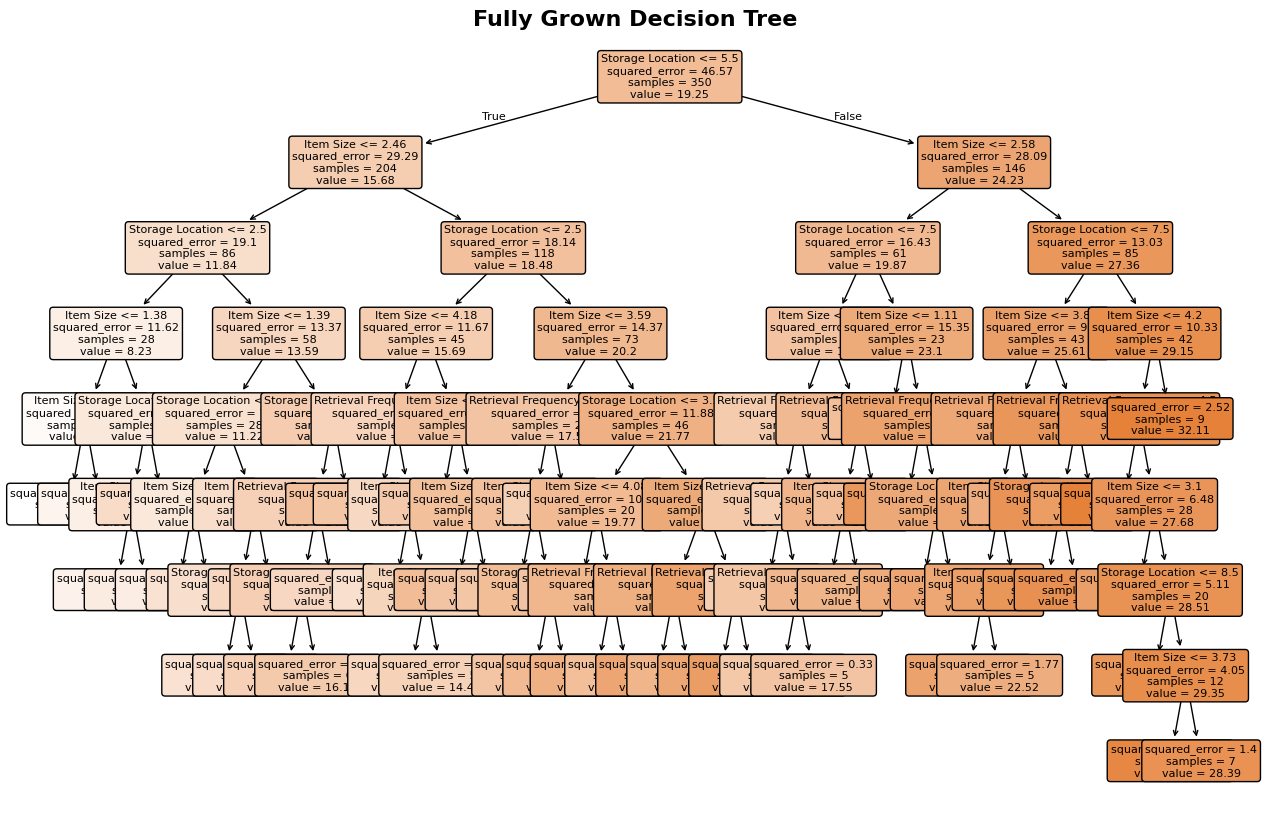

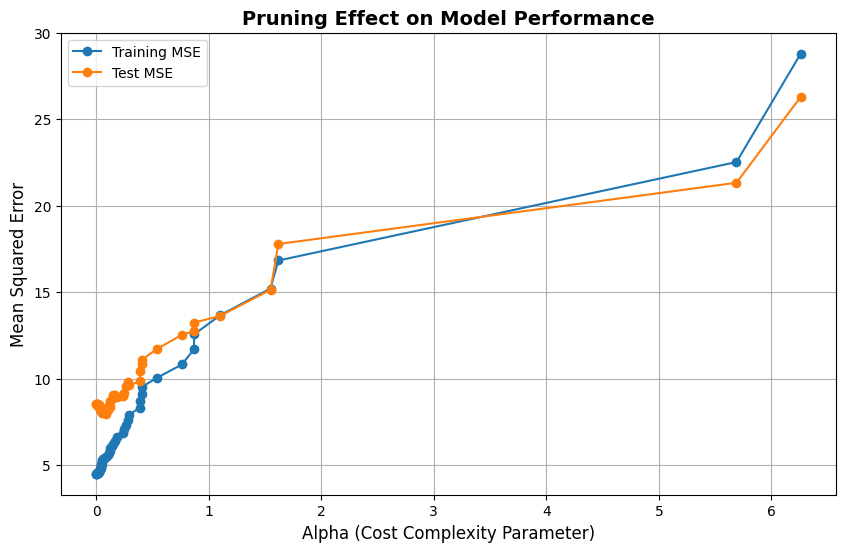

Optimal Alpha: 0.0849
Test MSE with Optimal Alpha: 7.99


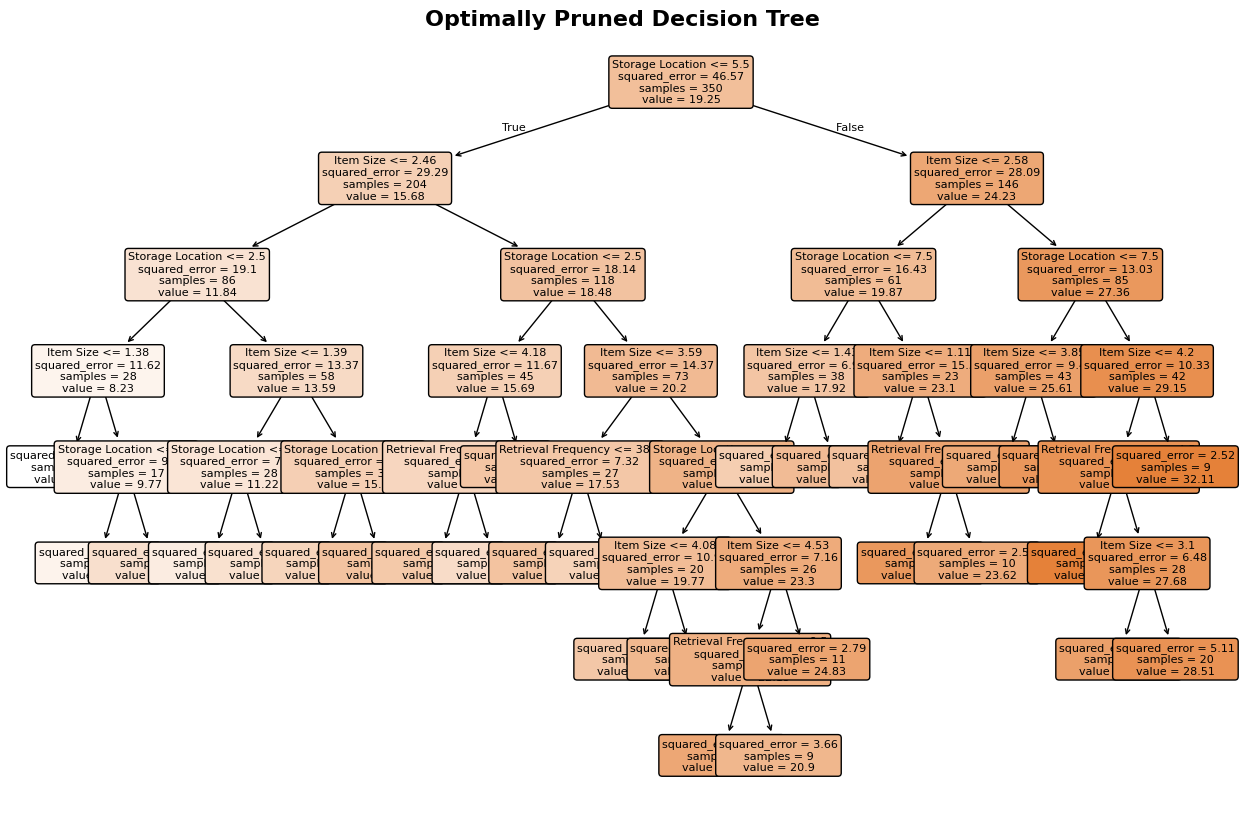

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Step 1: Simulated a dataset for warehouse logistics analysis
# I needed a dataset that emulated the operational variables in warehouse logistics. To achieve this, I simulated data
# that represented predictors such as storage location, retrieval frequency, and item size. By introducing noise,
# I ensured the dataset reflected the variability and complexity of real-world scenarios. This simulation was critical
# for testing the decision tree's ability to uncover meaningful patterns.
np.random.seed(42)  # I set a random seed to make the results reproducible, ensuring consistency across runs.
n_samples = 500

# Constructed predictors to emulate realistic warehouse operations
storage_location = np.random.randint(1, 10, size=n_samples)  # Discrete zones in the warehouse.
retrieval_frequency = np.random.randint(1, 50, size=n_samples)  # How often an item was retrieved per week.
item_size = np.random.uniform(0.5, 5.0, size=n_samples)  # Item size in cubic meters, reflecting storage complexity.

# Response variable: retrieval time
# I designed this response to reflect the influence of retrieval frequency, storage location, and item size.
# Noise was added to emulate real-world uncertainty and variability, which helped stress-test the model's performance.
retrieval_time = (
    10 / retrieval_frequency + 2 * storage_location + 3 * item_size + np.random.normal(scale=2, size=n_samples)
)

# Organized the data into a structured DataFrame for clarity
logistics_data = pd.DataFrame({
    "Storage Location": storage_location,
    "Retrieval Frequency": retrieval_frequency,
    "Item Size": item_size,
    "Retrieval Time": retrieval_time,
})

# Step 2: Split the data into training and testing sets
# I split the data to evaluate the decision tree's ability to generalize to unseen observations. The training set
# allowed me to build the model, while the test set helped validate its performance.
X = logistics_data[["Storage Location", "Retrieval Frequency", "Item Size"]]
y = logistics_data["Retrieval Time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Fitted a fully grown decision tree
# I initially built a fully grown tree to observe how it captured all patterns and interactions in the data.
# This approach provided insights into the complexity of the splits but also highlighted the risk of overfitting.
fully_grown_tree = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
fully_grown_tree.fit(X_train, y_train)

# Visualized the fully grown tree
# By visualizing the tree, I could understand the sequential partitioning of the predictor space. This was important
# to assess how the tree structured the data and whether the splits aligned with my expectations.
plt.figure(figsize=(15, 10))
plot_tree(fully_grown_tree, feature_names=X.columns, filled=True, fontsize=8, rounded=True, precision=2)
plt.title("Fully Grown Decision Tree", fontsize=16, fontweight="bold")
plt.show()

# Interpretation: The fully grown tree captured detailed splits and localized relationships. However, I recognized
# that such complexity introduced high variance, making the model less reliable when applied to new data.

# Step 4: Performed cost complexity pruning
# To address the issue of overfitting, I implemented cost complexity pruning. This technique penalized tree size,
# encouraging a balance between simplicity and accuracy. The cost complexity parameter (alpha) allowed me to control
# the trade-off between the tree's size and its performance.
ccp_path = fully_grown_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = ccp_path.ccp_alphas[:-1]  # Excluded the maximum value as it resulted in a single-node tree.

# Fitted pruned trees for each alpha
# I iteratively built pruned trees for different values of alpha to evaluate their performance and identify the optimal size.
pruned_trees = []
for alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(min_samples_leaf=5, ccp_alpha=alpha, random_state=42)
    pruned_tree.fit(X_train, y_train)
    pruned_trees.append(pruned_tree)

# Step 5: Evaluated cross-validation error for each pruned tree
# I calculated the mean squared error (MSE) for both training and test datasets to assess the impact of pruning.
# This helped me understand how the pruning process influenced the model's generalization ability.
from sklearn.metrics import mean_squared_error

train_errors = [mean_squared_error(y_train, tree.predict(X_train)) for tree in pruned_trees]
test_errors = [mean_squared_error(y_test, tree.predict(X_test)) for tree in pruned_trees]

# Plotted the relationship between alpha and MSE
# This plot allowed me to visually analyze the trade-off between tree complexity and prediction accuracy.
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_errors, label="Training MSE", marker="o")
plt.plot(ccp_alphas, test_errors, label="Test MSE", marker="o")
plt.xlabel("Alpha (Cost Complexity Parameter)", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.title("Pruning Effect on Model Performance", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.show()

# Interpretation:
# I observed that the test MSE initially decreased as alpha increased, reflecting improved generalization due to reduced overfitting.
# Beyond an optimal alpha, the test MSE began to rise, indicating underfitting as the tree became too simple to capture the data structure.

# Step 6: Selected the optimal alpha and pruned the tree
# I identified the optimal alpha by locating the point where the test MSE was minimized. This balance ensured that the pruned tree
# retained essential patterns without overfitting or underfitting.
optimal_index = np.argmin(test_errors)
optimal_alpha = ccp_alphas[optimal_index]
optimal_tree = pruned_trees[optimal_index]

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Test MSE with Optimal Alpha: {test_errors[optimal_index]:.2f}")

# Visualized the pruned tree
# This visualization highlighted the balance achieved through pruning. The reduced complexity made the tree more interpretable,
# while maintaining sufficient predictive power to support actionable decisions in warehouse logistics.
plt.figure(figsize=(15, 10))
plot_tree(optimal_tree, feature_names=X.columns, filled=True, fontsize=8, rounded=True, precision=2)
plt.title("Optimally Pruned Decision Tree", fontsize=16, fontweight="bold")
plt.show()

# Final Interpretation:
# The pruned tree reduced overfitting by eliminating redundant splits while preserving essential relationships in the data.
# Its compact structure enhanced interpretability, providing actionable insights for optimizing warehouse logistics.
# I concluded that cost complexity pruning effectively balanced bias and variance, resulting in a reliable and efficient model.
